# 라이브러리 호출

In [1]:
import numpy as np
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc
from matplotlib import style
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
style.use('ggplot')

from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go

import cufflinks as cf
cf.go_offline() 
cf.set_config_file(offline=False, world_readable=True) 

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
plt.rc('font', size=15)
plt.rc('axes', labelsize=20)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=15)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=10)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=10)  # 범례 폰트 크기
plt.rc('figure', titlesize=40) # figure title 폰트 크기

# 데이터 뜯어보기

In [3]:
train = pd.read_csv('./train_data_1.csv')

In [4]:
# 칼럼값을 이헤하기 쉽게 전환
train.rename(columns={'VN_1009_TP20' : 'MethodFreq', 'VN_1009_TP21' : 'MethodPref', 'VN_1009_TP21_6specify' : 'specificMethodPref',
                      'VN_1009_TP24_1' : 'ReviewReading', 'VN_1009_TP24_2' : 'Interaction', 'Q9C_P' : 'NumofPurchase', 'Q9D' : 'AvgAmountSpent',
                       'VN_1009_TP25A' : 'StoreLocation', 'poverq' : 'pd_qual', 'pq' : 'pd_pperp', 'repur' : 'sat_repur', 
                     'recomm':'sat_recomm', 'Q19':'sat_recomornot', 'VN_1009_Q20A' : 'sat_overall', 'VN_1009_TP01' : 'pd_interestvar',
                     'VN_1009_TP02':'pd_satisvar', 'VN_1009_TP05' : 'pd_avail', 'VN_1009_TP17':'pd_same', 
                      'soverq':'serv_qual', 'VN_1009_TP06':'serv_promo', 'VN_1009_TP18':'serv_feedback', 
                      'VN_1009_TP19':'serv_return', 'VN_1009_TP22':'serv_review', 'VN_1009_TP23':'serv_channels',
                     'VN_1009_TP13':'deliver_info', 'VN_1009_TP14':'deliver_range', 'VN_1009_TP15':'deliver_easytracking',
                      'VN_1009_TP16':'deliver_time','VN_1009_TP03' : 'if_EasyWeborApp', 'VN_1009_TP04': 'if_EasyFinding',
                      'VN_1009_TP07' : 'if_suffinfo',
                      'VN_1009_TP08' : 'if_EasyComparing', 'VN_1009_TP09': 'if_EasySpecialReq',
                      'VN_1009_TP10' : 'if_EasyShopcart', 'VN_1009_TP11' : 'if_Payment',
                      'VN_1009_TP12' : 'if_SafeWebsite'}, inplace=True)

In [5]:
# company별로 데이터 나누기

AMAZON = train[train['company_v'].isin(['AMAZON'])]
ZALORA = train[train['company_v'].isin(['ZALORA'])]
FAVE = train[train['company_v'].isin(['FAVE'])]
QOO10 = train[train['company_v'].isin(['QOO10'])]
EBAY = train[train['company_v'].isin(['EBAY'])]
TAOBAO = train[train['company_v'].isin(['TAOBAO/TMALL'])]
CAROUSELL = train[train['company_v'].isin(['CAROUSELL'])]
OTHERS = train[~train['company_v'].isin(['AMAZON', 'ZALORA', 'FAVE', 'QOO10', 'EBAY', 'TAOBAO/TMALL', 'CAROUSELL'])]

In [6]:
# 메인 회사 이외의 회사들을 others로 처리

train.loc[train['company_v'].isin(['SSENSE', 'SHOPBOP', 'ASOS', 'ALIEXPRESS', 'EZBUY', 'SHOPEE','NET-A-PORTER', 'LAZADA', 
                                   'HONESTBEE', 'REEBONZ', 'WISH', 'REDMART', 'DRESSABELLE', 'RAKUTEN']), 'company_v'] = 'OTHERS'

In [7]:
train.company_v.unique()

array(['EBAY', 'TAOBAO/TMALL', 'FAVE', 'ZALORA', 'QOO10', 'CAROUSELL',
       'AMAZON', 'OTHERS'], dtype=object)

In [8]:
train.columns

Index(['uid', 'company_v', 'pd_qual', 'serv_qual', 'pd_pperp', 'satis',
       'sat_repur', 'sat_recomm', 'sat_recomornot', 'sat_overall',
       'pd_interestvar', 'pd_satisvar', 'if_EasyWeborApp', 'if_EasyFinding',
       'pd_avail', 'serv_promo', 'if_suffinfo', 'if_EasyComparing',
       'if_EasySpecialReq', 'if_EasyShopcart', 'if_Payment', 'if_SafeWebsite',
       'deliver_info', 'deliver_range', 'deliver_easytracking', 'deliver_time',
       'pd_same', 'serv_feedback', 'serv_return', 'MethodFreq', 'MethodPref',
       'specificMethodPref', 'ReviewReading', 'Interaction', 'serv_review',
       'serv_channels', 'NumofPurchase', 'AvgAmountSpent', 'StoreLocation',
       'age', 'race', 'work', 'pincome', 'income', 'educat', 'childsupp',
       'marital', 'gender', 'house', 'DOI'],
      dtype='object')

In [9]:
for i in train.columns:
    print({i:[train[i].unique(), train[i].nunique()]})

{'uid': [array([3714, 3309, 1412, ..., 3665, 4111, 3846], dtype=int64), 1120]}
{'company_v': [array(['EBAY', 'TAOBAO/TMALL', 'FAVE', 'ZALORA', 'QOO10', 'CAROUSELL',
       'AMAZON', 'OTHERS'], dtype=object), 8]}
{'pd_qual': [array([ 5,  9,  7,  8, 10,  4,  2,  6,  3], dtype=int64), 9]}
{'serv_qual': [array([ 4,  7,  9,  8,  6, 10,  2,  5,  3], dtype=int64), 9]}
{'pd_pperp': [array([ 3,  7,  6,  9,  8,  5,  4, 10,  2], dtype=int64), 9]}
{'satis': [array([ 4,  8,  7,  6,  9,  5,  3, 10,  2], dtype=int64), 9]}
{'sat_repur': [array([ 4,  8,  6,  7,  9,  3, 10,  5,  2], dtype=int64), 9]}
{'sat_recomm': [array([ 4,  8,  7,  5,  9,  6,  2, 10,  3], dtype=int64), 9]}
{'sat_recomornot': [array([0, 1], dtype=int64), 2]}
{'sat_overall': [array([ 4,  7,  6,  8,  9,  3, 10,  5,  2], dtype=int64), 9]}
{'pd_interestvar': [array([ 7,  8,  6,  9, 10,  4,  5,  3], dtype=int64), 8]}
{'pd_satisvar': [array([ 6,  7,  8,  9, 10,  3,  4,  2,  5], dtype=int64), 9]}
{'if_EasyWeborApp': [array([ 7,  6,  8,  9, 

**무응답(' ', 97, 98, 99) 발생 변수**

- if_EasySpecialReq
- deliver_info
- deliver_range
- deliver_easytracking
- deliver_time
- serv_feedback
- serv_return
- serv_review
- serv_channels
- pincome
- income
- childsupp

# 결측치/이상치 처리 방법 by EDA 결과

1. 먼저 비슷한 이야기를 하고 있는 변수들을 모아 **product, interface, service, delivery의 카테고리로 분류**
2. 그 외의 변수들을 기본 정보를 나타내는 **신상변수**로 취급
3. 메인 companies + Others까지 총 8개의 회사들을 두 개씩 분담하여 회사별 신상변수 추이 EDA 진행
4. 회의를 통해 회사별 각 신상변수의 추이에 관한 논의 -> 회사별 특징 파악
5. 각자 product, interface, service, delivery 네 개의 변수 + 공통 신상변수들로 전체 회사를 대상으로 한 EDA
6. EDA한 결과 대부분의 최빈값이 유의한 정도로 양이 많지 않은 것들은 최빈값으로 진행하기로 결정

## if_EasySpecialReq - 최빈값

In [10]:
train.if_EasySpecialReq.value_counts()

8     303
7     262
9     198
6     176
97    120
10     37
5      15
3       5
4       3
2       1
Name: if_EasySpecialReq, dtype: int64

In [11]:
train.if_EasySpecialReq.replace([97, 98, 99], np.nan, inplace=True)
if_EasySpecialReq_mode = train.if_EasySpecialReq.value_counts(dropna = True).idxmax()
train.if_EasySpecialReq =  train.if_EasySpecialReq.fillna(if_EasySpecialReq_mode) #최빈값
train.if_EasySpecialReq.value_counts()

8.0     423
7.0     262
9.0     198
6.0     176
10.0     37
5.0      15
3.0       5
4.0       3
2.0       1
Name: if_EasySpecialReq, dtype: int64

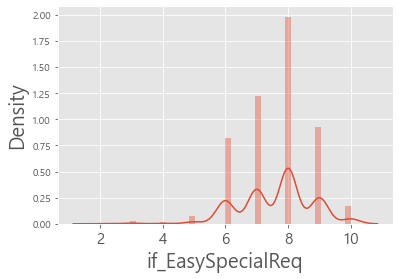

In [12]:
sns.distplot(train['if_EasySpecialReq'])
plt.show()

## deliver_info - 최빈값

In [13]:
train.deliver_info.unique()

array([ 7,  8,  6, 10,  9,  4,  5, 97,  3,  2], dtype=int64)

In [14]:
train.deliver_info.replace([97, 98, 99], np.nan, inplace=True)
temp = train.deliver_info.value_counts(dropna = True).idxmax()
train.deliver_info =  train.deliver_info.fillna(temp).astype(np.int64) #최빈값
train.deliver_info.value_counts()

8     340
7     336
9     193
6     167
10     68
4      11
3       3
2       1
5       1
Name: deliver_info, dtype: int64

## deliver_range - 최빈값

In [15]:
train.deliver_range.unique()

array([ 7,  8,  6, 10,  9,  5, 97,  4,  3,  2], dtype=int64)

In [16]:
train.deliver_range.replace([97, 98, 99], np.nan, inplace=True)
temp = train.deliver_range.value_counts(dropna = True).idxmax()
train.deliver_range =  train.deliver_range.fillna(temp).astype(np.int64) #최빈값
train.deliver_range.value_counts()

8     356
7     275
9     212
6     190
10     65
4       9
3       6
5       4
2       3
Name: deliver_range, dtype: int64

## deliver_easytracking - 최빈값

In [17]:
train.deliver_easytracking.unique()

array([ 6,  8,  7,  9, 97,  3, 10,  5,  2,  4], dtype=int64)

In [18]:
train.deliver_easytracking.replace([97, 98, 99], np.nan, inplace=True)
temp = train.deliver_easytracking.value_counts(dropna = True).idxmax()
train.deliver_easytracking =  train.deliver_easytracking.fillna(temp).astype(np.int64) #최빈값
train.deliver_easytracking.value_counts()

8     462
7     244
6     167
9     167
10     54
5      11
3       7
4       6
2       2
Name: deliver_easytracking, dtype: int64

## deliver_time - 최빈값

In [19]:
train.deliver_time.unique()

array([ 8,  7,  9, 10,  6,  4,  5,  2,  3, 97], dtype=int64)

In [20]:
train.deliver_time.replace([97, 98, 99], np.nan, inplace=True)
temp = train.deliver_time.value_counts(dropna = True).idxmax()
train.deliver_time =  train.deliver_time.fillna(temp) #최빈값
train.deliver_time.value_counts()

8.0     349
7.0     314
9.0     221
6.0     133
10.0     84
3.0      10
5.0       4
4.0       3
2.0       2
Name: deliver_time, dtype: int64

## serv_feedback - 최빈값

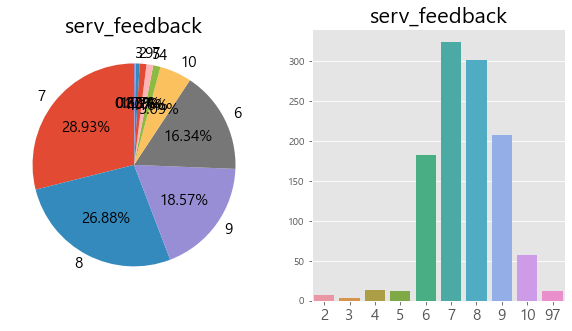

In [21]:
plt.figure(figsize = (10, 5))
plt.subplot(121)
train.serv_feedback.value_counts().plot.pie(autopct='%1.2f%%', startangle=90)
plt.title("serv_feedback")
plt.ylabel(None)

plt.subplot(122)
sns.countplot('serv_feedback', data=train)
plt.title("serv_feedback")
plt.ylabel(None)
plt.xlabel(None)

plt.show()

<AxesSubplot:xlabel='company_v', ylabel='count'>

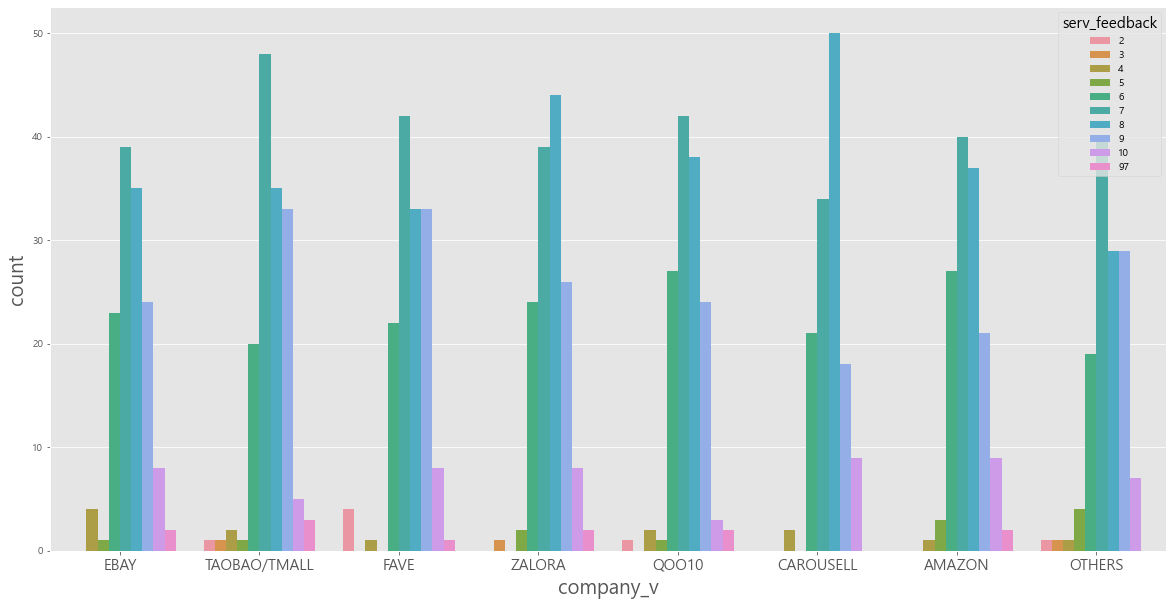

In [22]:
#표본 수 많은 회사들에 대해서 결측치 존재! 어느 회사에 편향되지는 않은듯. 
plt.figure(figsize=(20,10))
sns.countplot('company_v', hue='serv_feedback', data=train)

In [23]:
#정규분포를 정확히 따르지 않으므로, 평균 대신 최빈값인 7로 대체
train.serv_feedback.replace(97, 7, inplace=True) 

In [24]:
train.serv_feedback.value_counts()

7     336
8     301
9     208
6     183
10     57
4      13
5      12
2       7
3       3
Name: serv_feedback, dtype: int64

## serv_return - 최빈값

serv_return 결측치 18%, 최빈값으로 대체

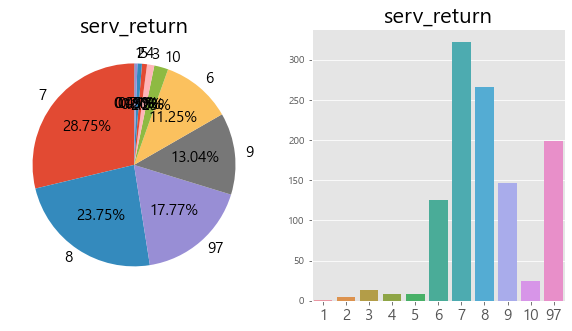

In [25]:
plt.figure(figsize = (10, 5))
plt.subplot(121)
train.serv_return.value_counts().plot.pie(autopct='%1.2f%%', startangle=90)
plt.title("serv_return")
plt.ylabel(None)

plt.subplot(122)
sns.countplot('serv_return', data=train)
plt.title("serv_return")
plt.ylabel(None)
plt.xlabel(None)

plt.show()

<AxesSubplot:xlabel='company_v', ylabel='count'>

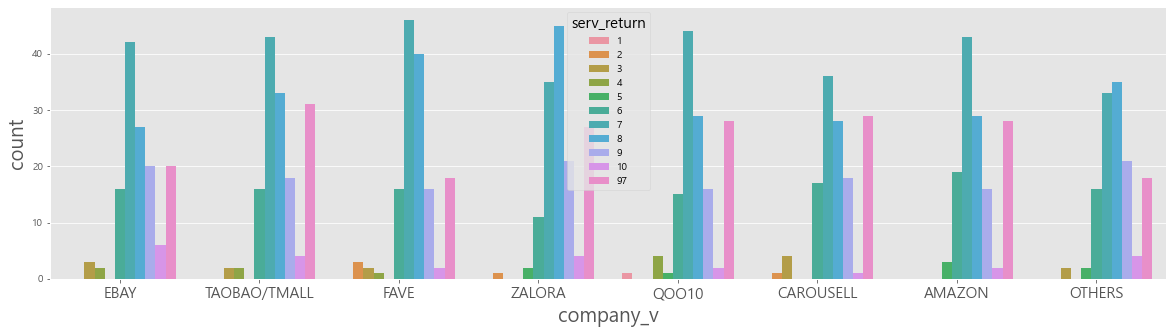

In [26]:
#주요 회사 별로도 결측치가 꽤 있음. 
plt.figure(figsize=(20,5))
sns.countplot('company_v', hue='serv_return', data=train)

In [27]:
train.serv_return.replace(97, 7, inplace=True) 
train['serv_return'].value_counts()

7     521
8     266
9     146
6     126
10     25
3      13
4       9
5       8
2       5
1       1
Name: serv_return, dtype: int64

## serv_review, serv_channels -> 쓰지 않을 변수라 전처리X

## pincome - 최빈값

In [28]:
# 먼저 무응답을 모두 98로 처리

train.pincome.replace(' ', 98, inplace=True)
train.pincome = train.pincome.astype(np. int64)
train.pincome.unique()

array([ 3,  2,  4,  5, 98,  1,  6,  7,  9,  8], dtype=int64)

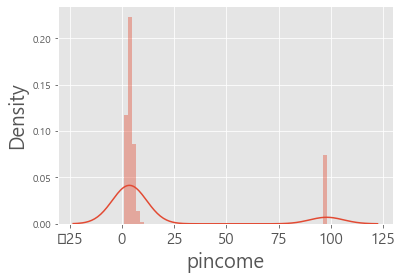

In [29]:
sns.distplot(train.pincome)
plt.rc('font', size=9)

In [30]:
train.pincome.value_counts() #최빈값 4로 대체

4     259
3     226
2     223
98    160
5     130
6      57
1      32
7      24
8       5
9       4
Name: pincome, dtype: int64

In [31]:
train.pincome.replace(98, 4, inplace=True)

## income - 최빈값

<AxesSubplot:xlabel='income', ylabel='Density'>

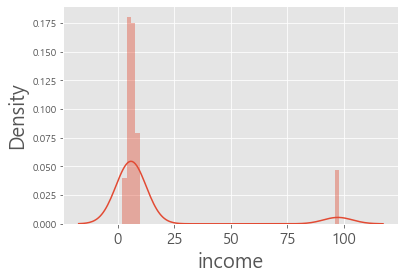

In [32]:
sns.distplot(train['income'])

In [33]:
train.income.replace([97, 98, 99], np.nan, inplace=True)
income_mode = train.income.value_counts(dropna = True).idxmax()
train.income =  train.income.fillna(income_mode).astype(np. int64) #최빈값
train.income.value_counts()

5    353
6    194
7    182
4    136
8    116
3     72
9     54
2     13
Name: income, dtype: int64

<AxesSubplot:xlabel='company_v'>

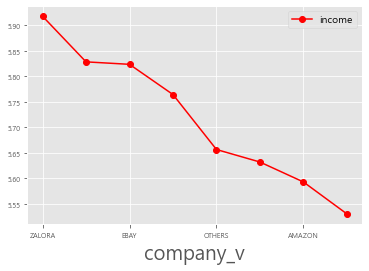

In [34]:
income_mean = train.groupby('company_v')[['income']].mean().sort_values(by ='income', ascending = False)
income_mean.plot(marker='o', color=['r','b','g','y', 'c', 'm', 'k', 'w'], fontsize=7)

## childsupp - marital을 기반하여 자녀 없음으로 처리

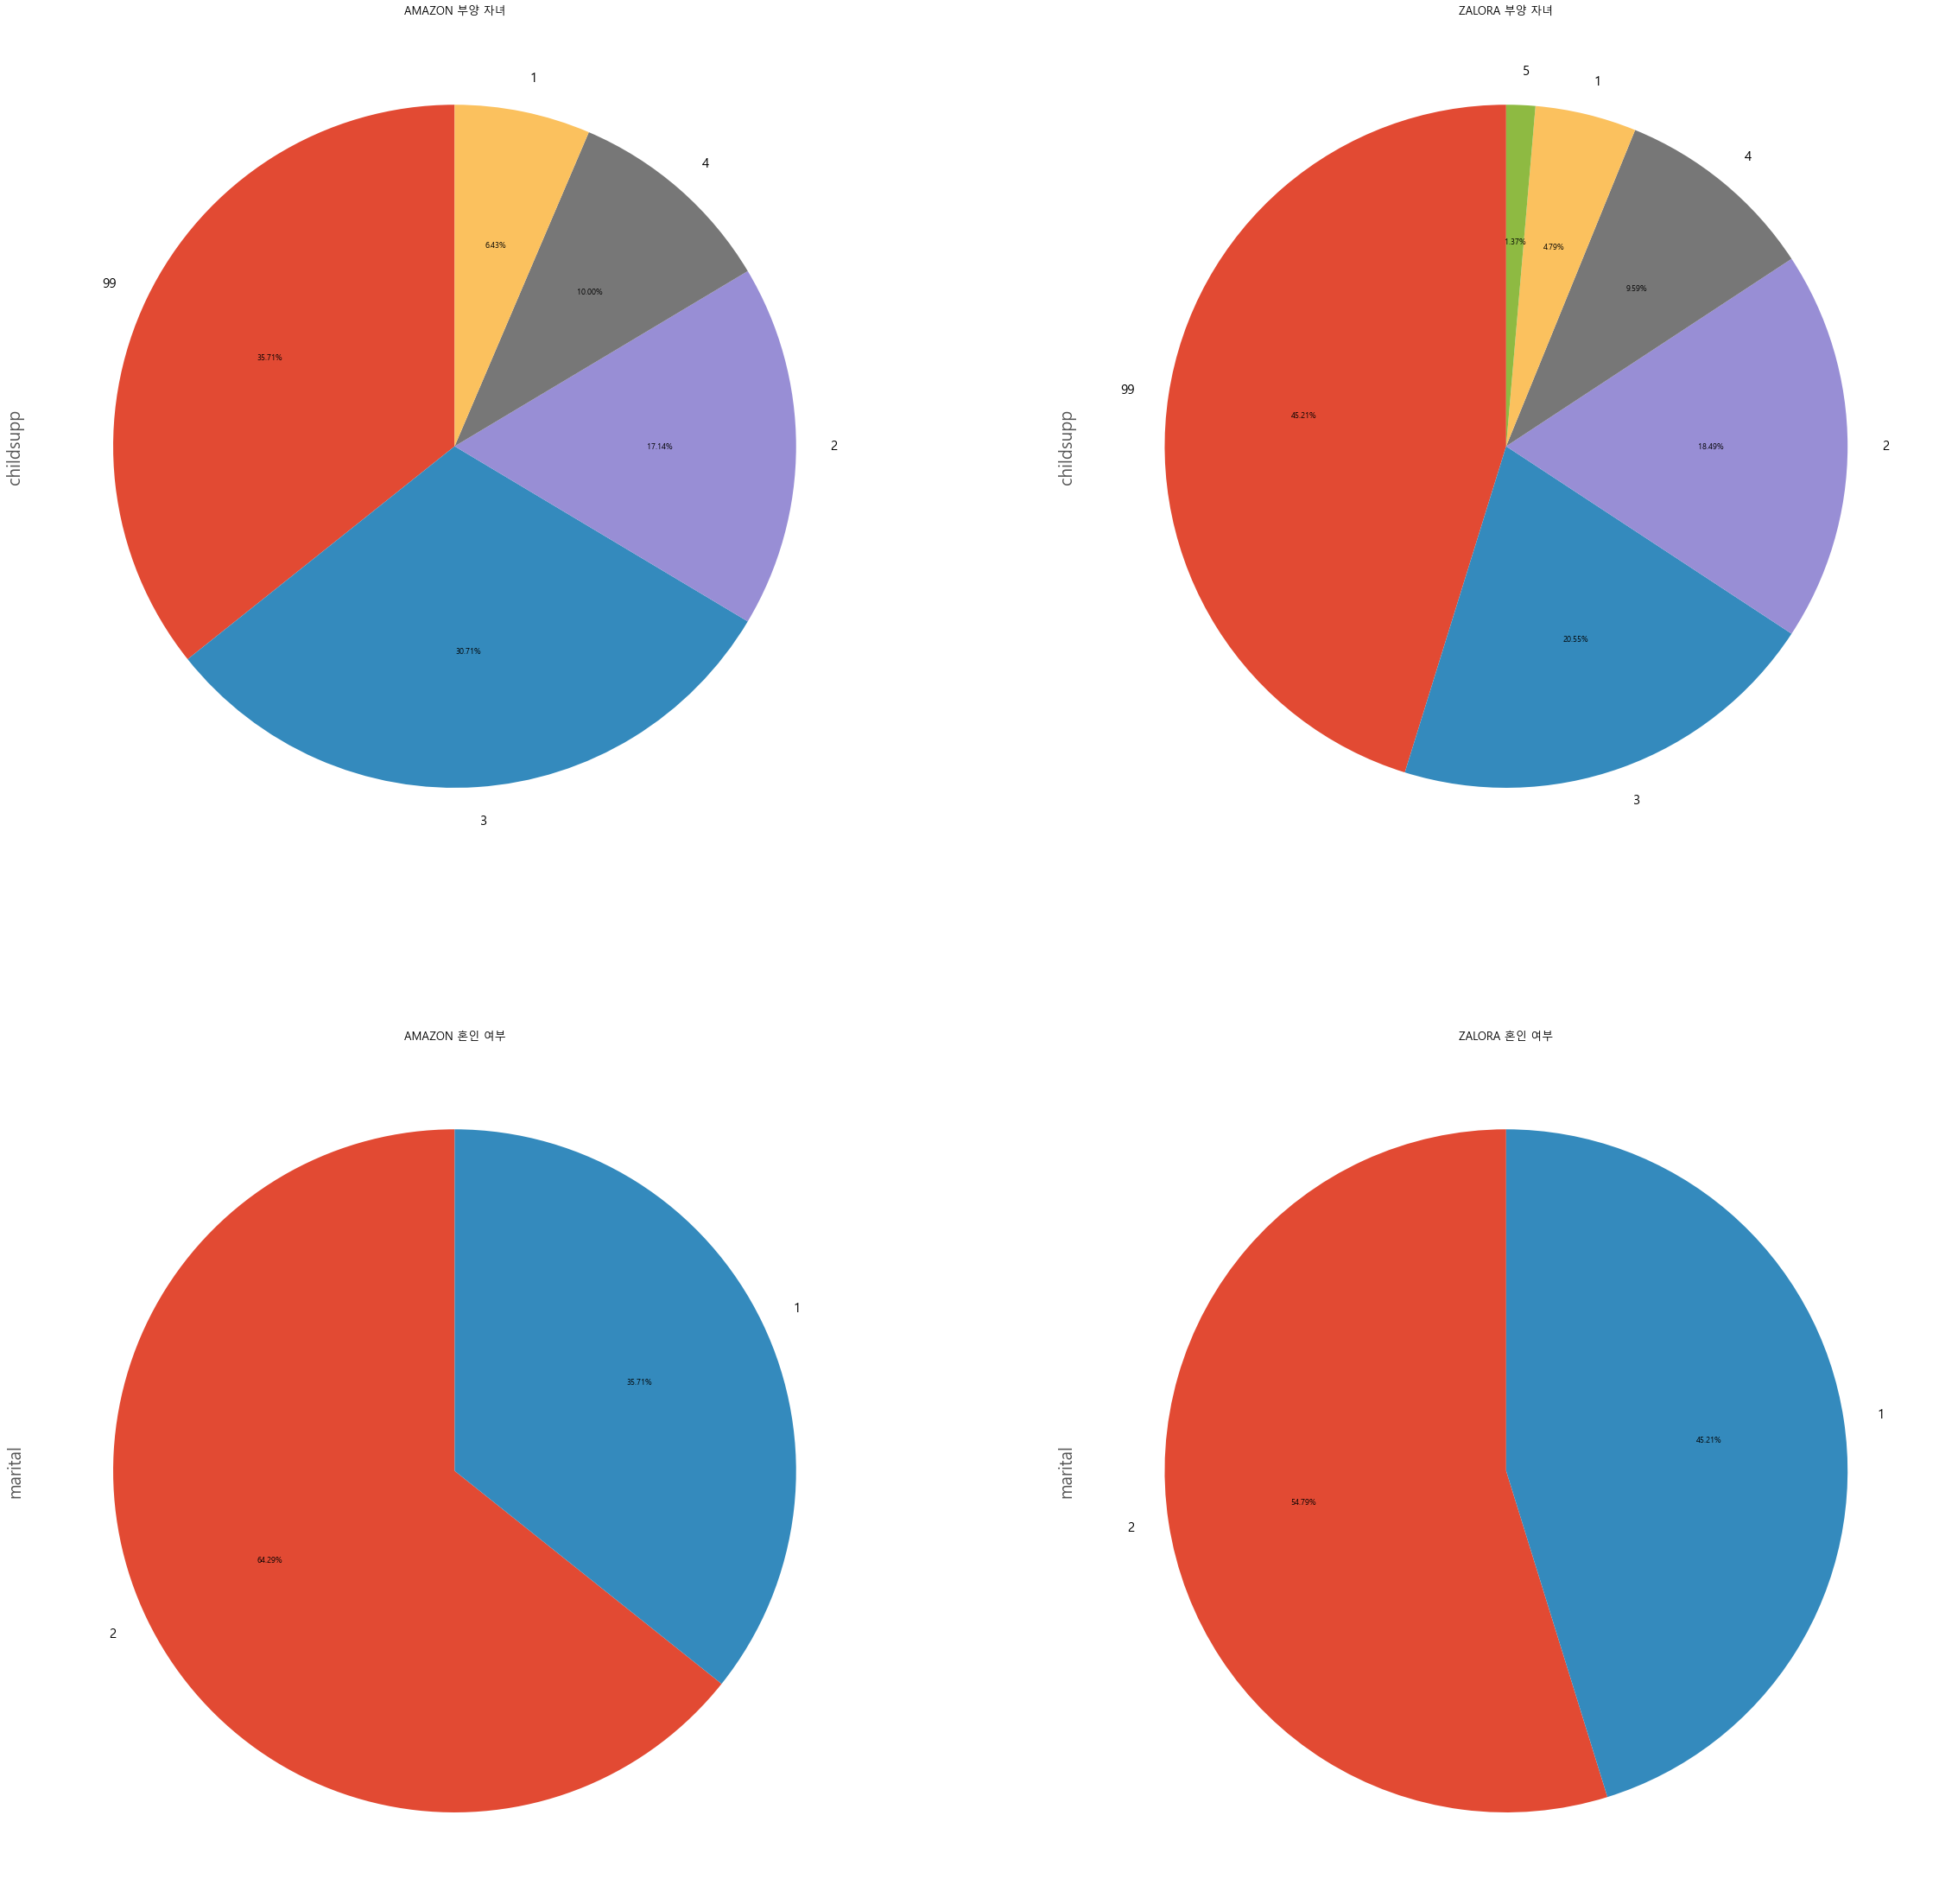

In [35]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(40,40)

AMAZON.childsupp.value_counts().plot.pie(autopct='%1.2f%%', startangle=90, ax=axes[0][0])
axes[0][0].set(title="AMAZON 부양 자녀")
AMAZON.marital.value_counts().plot.pie(autopct='%1.2f%%', startangle=90, ax=axes[1][0])
axes[1][0].set(title="AMAZON 혼인 여부")

ZALORA.childsupp.value_counts().plot.pie(autopct='%1.2f%%', startangle=90, ax=axes[0][1])
axes[0][1].set(title="ZALORA 부양 자녀")
ZALORA.marital.value_counts().plot.pie(autopct='%1.2f%%', startangle=90, ax=axes[1][1])
axes[1][1].set(title="ZALORA 혼인 여부")

plt.show()

- 자녀여부의 무응답(99)와 혼인 여부에서 single을 선택한 사람 수가 동일 (다른 company도 마찬가지)<br>
    -> 99를 자녀 None으로 변경!

In [36]:
train.childsupp.replace(99,1, inplace=True)
train.childsupp.unique()

array([1, 4, 2, 3, 5], dtype=int64)

In [37]:
train.to_csv("train4.csv", index=False)

# EDA 결과 (Amazon 특징에 대한 Insight)

## Incomes

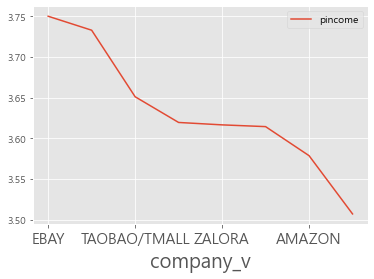

In [38]:
#pincome, Amazon은 주 이용층 평균이 하위권
train.groupby('company_v')[['pincome']].mean().sort_values(by ='pincome', ascending = False).plot()

plt.rc('font', size=15)

<AxesSubplot:xlabel='company_v'>

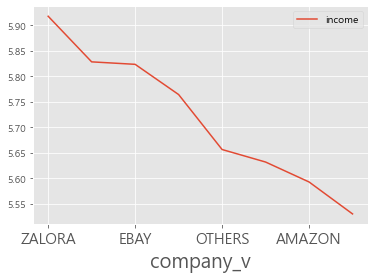

In [39]:
#income, Amazon은 주 이용층 평균이 하위권
train.groupby('company_v')[['income']].mean().sort_values(by ='income', ascending = False).plot()

## Gender

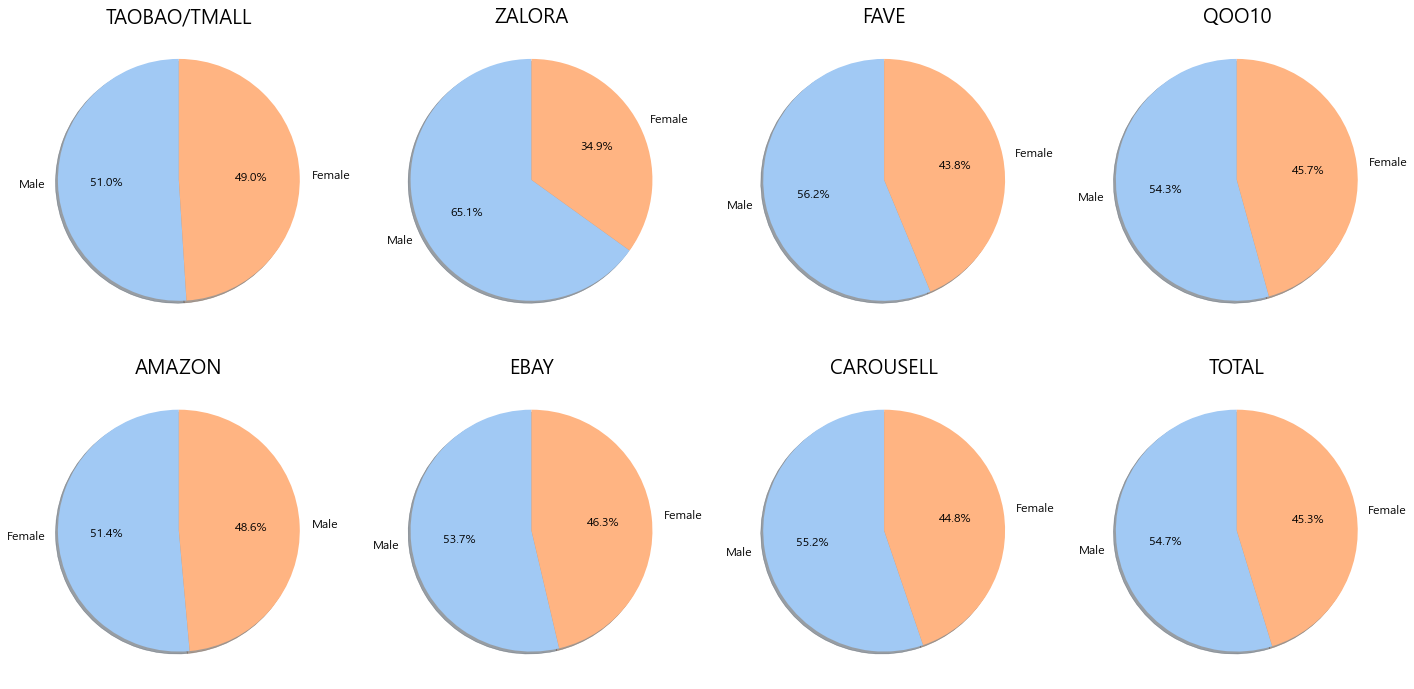

In [40]:
plt.figure(figsize=(20, 10))
sns.set_palette("pastel")
labels = ['Male', 'Female']
labels_1 = ['Female', 'Male']

plt.subplot(241)
TAOBAO.gender.value_counts().plot.pie(labels=labels,
                                         autopct='%1.1f%%',
                                         startangle = 90,
                                         shadow=True,
                                         textprops={'fontsize': 12})
plt.title('TAOBAO/TMALL', fontsize = 20)
plt.ylabel(None)

plt.subplot(242)
ZALORA.gender.value_counts().plot.pie(labels=labels,
                                         autopct='%1.1f%%',
                                         startangle = 90,
                                         shadow=True,
                                         textprops={'fontsize': 12})
plt.title('ZALORA', fontsize = 20)
plt.ylabel(None)

plt.subplot(243)
FAVE.gender.value_counts().plot.pie(labels=labels,
                                         autopct='%1.1f%%',
                                         startangle = 90,
                                         shadow=True,
                                         textprops={'fontsize': 12})
plt.title('FAVE', fontsize=20)
plt.ylabel(None)

plt.subplot(244)
QOO10.gender.value_counts().plot.pie(labels=labels,
                                         autopct='%1.1f%%',
                                         startangle = 90,
                                         shadow=True,
                                         textprops={'fontsize': 12})
plt.title('QOO10', fontsize=20)
plt.ylabel(None)

plt.subplot(245)
AMAZON.gender.value_counts().plot.pie(labels=labels_1,
                                         autopct='%1.1f%%',
                                         startangle = 90,
                                         shadow=True,
                                         textprops={'fontsize': 12})
plt.title('AMAZON', fontsize=20)
plt.ylabel(None)

plt.subplot(246)
EBAY.gender.value_counts().plot.pie(labels=labels,
                                         autopct='%1.1f%%',
                                         startangle = 90,
                                         shadow=True,
                                         textprops={'fontsize': 12})
plt.title('EBAY', fontsize=20)
plt.ylabel(None)

plt.subplot(247)
CAROUSELL.gender.value_counts().plot.pie(labels=labels,
                                         autopct='%1.1f%%',
                                         startangle = 90,
                                         shadow=True,
                                         textprops={'fontsize': 12})
plt.title('CAROUSELL', fontsize=20)
plt.ylabel(None)

plt.subplot(248)
train.gender.value_counts().plot.pie(labels=labels,
                                         autopct='%1.1f%%',
                                         startangle = 90,
                                         shadow=True,
                                         textprops={'fontsize': 12})
plt.title('TOTAL', fontsize=20)
plt.ylabel(None)

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='company_v'>

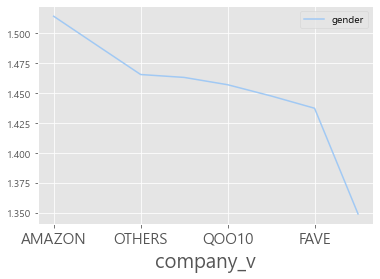

In [41]:
#gender, Amazon은 상위권!! -> 여자사용자가 많은 유일한 회사
train.groupby('company_v')[['gender']].mean().sort_values(by ='gender', ascending = False).plot()

Text(0, 0.5, '')

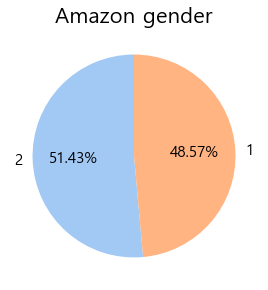

In [42]:
plt.figure(figsize = (10, 5))
plt.subplot(121)
train.loc[(train['company_v']=='AMAZON')]['gender'].value_counts().plot.pie(autopct='%1.2f%%', startangle=90)
plt.title("Amazon gender")
plt.ylabel(None)

## Interaction

<AxesSubplot:xlabel='company_v'>

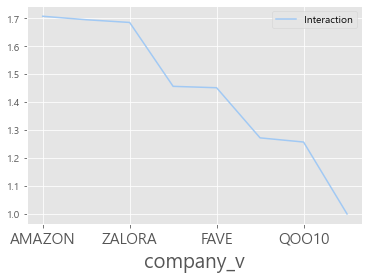

In [43]:
#Interaction, Amazon의 셀러와의 상호작용은 최상위
train.groupby('company_v')[['Interaction']].mean().sort_values(by ='Interaction', ascending = False).plot()

## Age

<AxesSubplot:xlabel='company_v'>

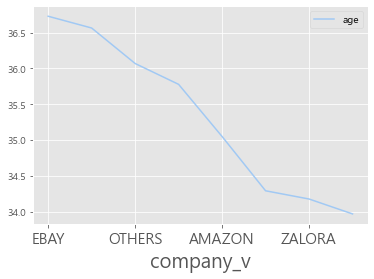

In [44]:
#age, Amazon은 중위권
train.groupby('company_v')[['age']].mean().sort_values(by ='age', ascending = False).plot()

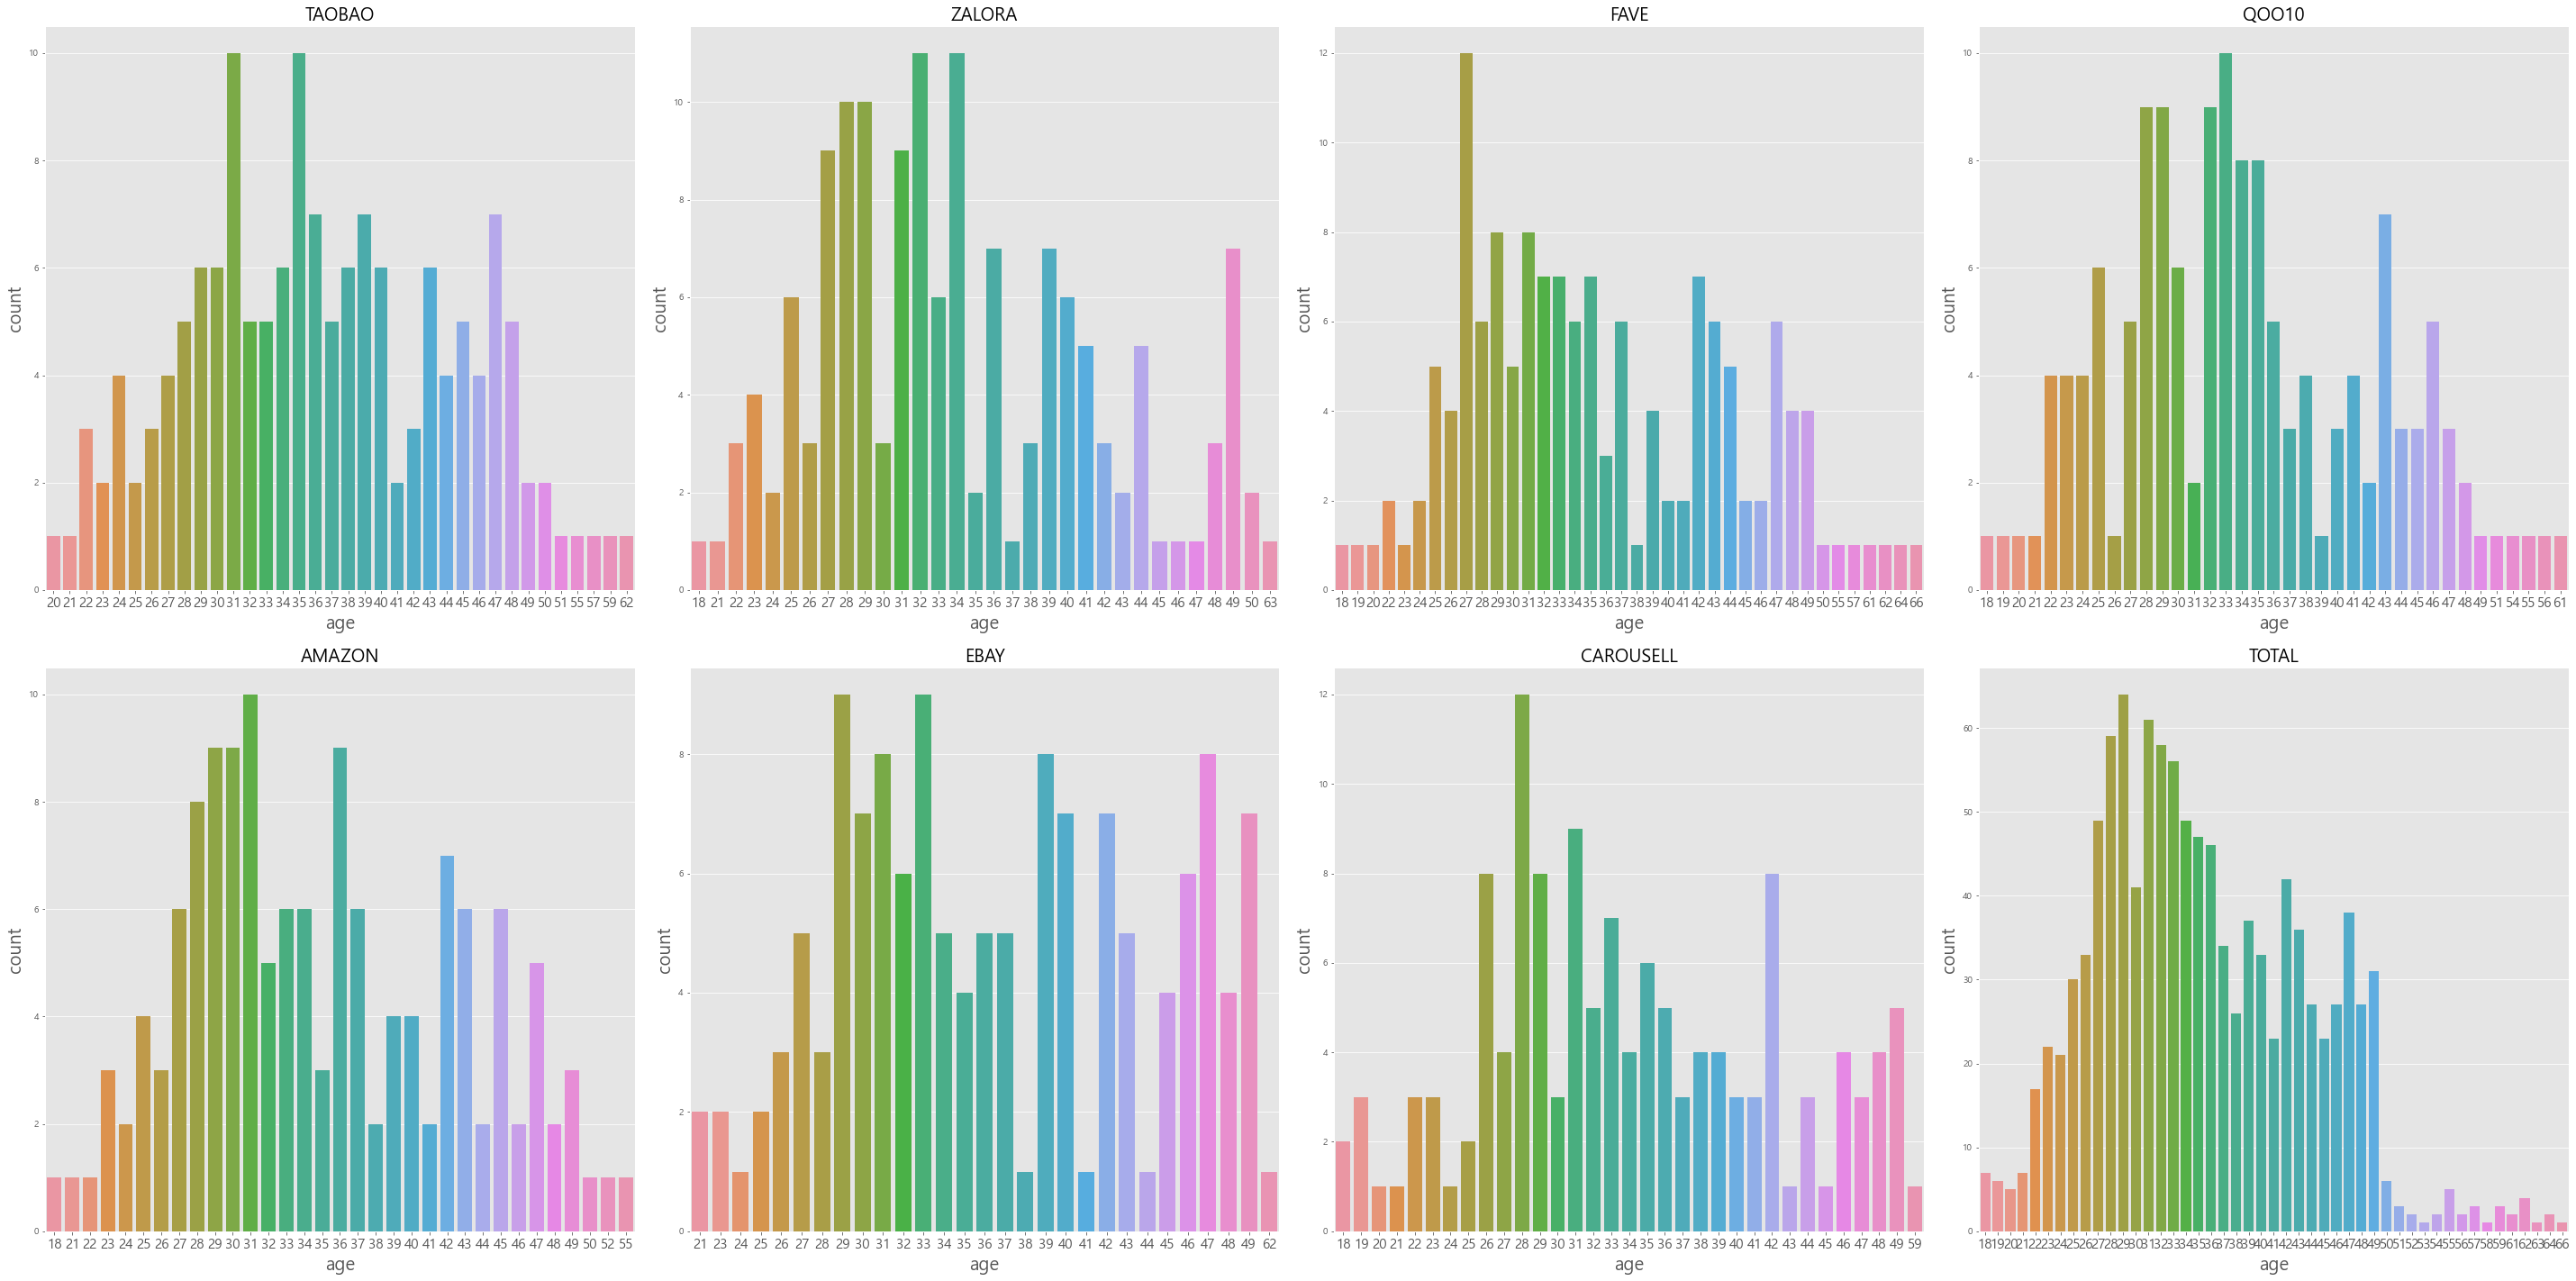

In [45]:
plt.figure(figsize=(40, 20))
sns.set_palette("pastel")

plt.subplot(241)
sns.countplot(data=TAOBAO, x='age')
plt.title('TAOBAO', fontsize=20)


plt.subplot(242)
sns.countplot(data=ZALORA, x='age')
plt.title('ZALORA', fontsize=20)

plt.subplot(243)
sns.countplot(data=FAVE, x='age')
plt.title('FAVE', fontsize=20)

plt.subplot(244)
sns.countplot(data=QOO10, x='age')
plt.title('QOO10', fontsize=20)

plt.subplot(245)
sns.countplot(data=AMAZON, x='age')
plt.title('AMAZON', fontsize=20)

plt.subplot(246)
sns.countplot(data=EBAY, x='age')
plt.title('EBAY', fontsize=20)

plt.subplot(247)
sns.countplot(data=CAROUSELL, x='age')
plt.title('CAROUSELL', fontsize=20)

plt.subplot(248)
sns.countplot(data=train, x='age')
plt.title('TOTAL', fontsize=20)

plt.tight_layout()
plt.show()


## Interface

### payment

In [46]:
train.if_Payment.value_counts()

8     358
7     329
9     211
6     155
10     56
5       6
4       3
2       1
3       1
Name: if_Payment, dtype: int64

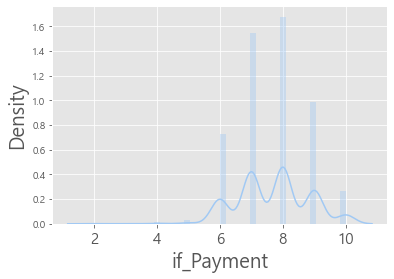

In [47]:
sns.distplot(train['if_Payment'])
plt.show()

In [48]:
company_P = train['if_Payment'].groupby(train['company_v']).mean().to_frame().sort_values(by="if_Payment", ascending=False)
company_P

,if_Payment
company_v,
AMAZON,7.821429
ZALORA,7.794521
CAROUSELL,7.761194
QOO10,7.721429
FAVE,7.673611
OTHERS,7.595420
EBAY,7.573529
TAOBAO/TMALL,7.510067


<Figure size 2160x1440 with 0 Axes>

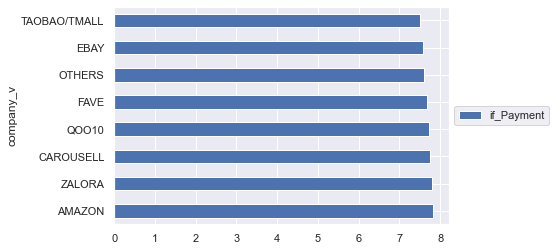

In [49]:
plt.figure(figsize = (30, 20))
sns.set(font_scale=1)
company_P.plot(kind='barh')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

- 큰 차이는 없지만, 상위권과 하위권을 파악할 수 있게 됨
- Amazon이 전체 만족도가 높은 Zarola와 eBay를 포함한 모든 쇼핑몰 중에서 가장 높은 평가 점수를 기록함
- Amazon이 평가 점수에서 타 쇼핑몰에 대해 상대 우위를 점하기 위해서는 이미 높은 평가를 받고 있는 항목보다 떨어지는 항목에 집중해야 함
- 따라서 if_Payment는 다중회귀분석 모델에 포함하지 않음

### website

In [50]:
train.if_SafeWebsite.value_counts()

8     363
7     275
9     232
6     144
10     94
5       6
4       5
3       1
Name: if_SafeWebsite, dtype: int64

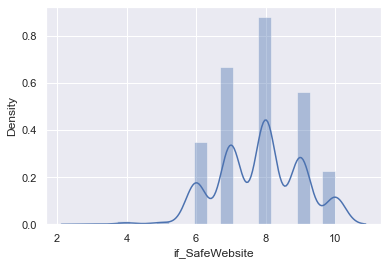

In [51]:
sns.distplot(train['if_SafeWebsite'])
plt.show()

In [52]:
company_SW = train['if_SafeWebsite'].groupby(train['company_v']).mean().to_frame().sort_values(by="if_SafeWebsite", ascending=False)
company_SW

,if_SafeWebsite
company_v,
AMAZON,8.057143
QOO10,7.935714
ZALORA,7.910959
CAROUSELL,7.813433
FAVE,7.798611
EBAY,7.779412
TAOBAO/TMALL,7.731544
OTHERS,7.633588


<Figure size 2160x1440 with 0 Axes>

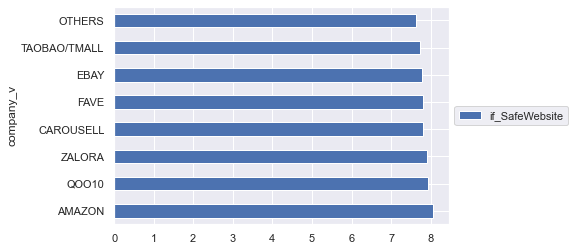

In [53]:
plt.figure(figsize = (30, 20))
sns.set(font_scale=1)
company_SW.plot(kind='barh')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Service

<AxesSubplot:xlabel='company_v', ylabel='count'>

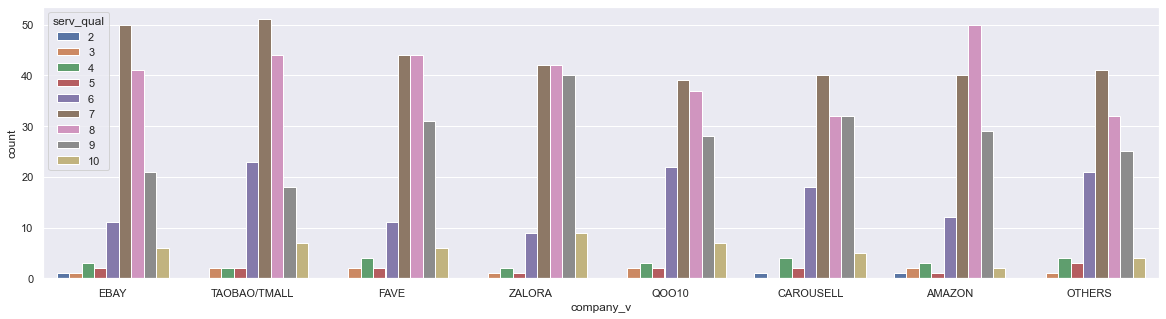

In [54]:
#아래처럼, 그래프는 뭔가..보기 힘드니.. 표로 시각화하자!
plt.figure(figsize=(20,5))
sns.countplot('company_v', hue='serv_qual', data=train)

<AxesSubplot:xlabel='company_v'>

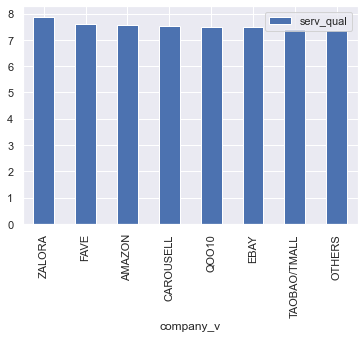

In [55]:
#serv_qual에서 Amazon은 상위권
train.groupby('company_v')[['serv_qual']].mean().sort_values(by ='serv_qual', ascending = False).plot(kind='bar')

- AMAZON의 주요 소비층은 소득평균이 하위권이다. (350-520만원)
- 유일하게 여자가 더 많다 (평균 1등!!)
- 셀러와 고객의 상호작용이 가장 많다
- 아마존 = 젊은 피
- 웹사이트 보안성과 payment의 편리성이 굉장히 좋다
- 그러나 제품력, 딜리버리 안좋음

# EDA 결과 (modeling에 넣을 변수)

- 만족도 추이를 보고 독립변수들의 추이가 만족도의 추이와 비슷하다면 그것이 만족도에게 영향을 주기 때문에 두 추이가 비슷하다고 판단

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'EBAY'),
  Text(1, 0, 'TAOBAO/TMALL'),
  Text(2, 0, 'FAVE'),
  Text(3, 0, 'ZALORA'),
  Text(4, 0, 'QOO10'),
  Text(5, 0, 'CAROUSELL'),
  Text(6, 0, 'AMAZON'),
  Text(7, 0, 'OTHERS')])

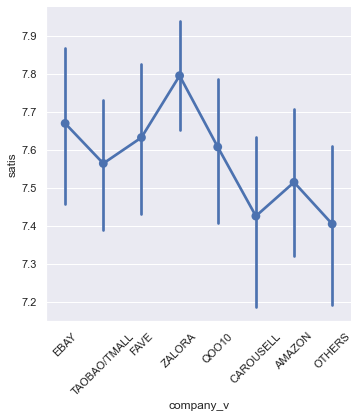

In [56]:
sns.factorplot('company_v', 'satis', data=train)
plt.xticks(rotation=45)

- TOP : ZALORA, EBAY
- MIDDLE : FAVE, QOO10, TAOBAO
- BOTTOM : AMAZON, CAROUSELL

## sat_repur

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'EBAY'),
  Text(1, 0, 'TAOBAO/TMALL'),
  Text(2, 0, 'FAVE'),
  Text(3, 0, 'ZALORA'),
  Text(4, 0, 'QOO10'),
  Text(5, 0, 'CAROUSELL'),
  Text(6, 0, 'AMAZON'),
  Text(7, 0, 'OTHERS')])

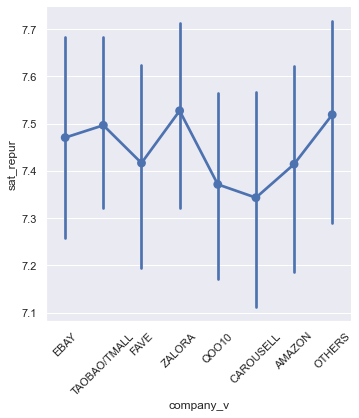

In [57]:
sns.factorplot('company_v', 'sat_repur', data=train)
plt.xticks(rotation=45)

- 만족도 양상과 매우 비슷 <- 만족도에 유의미한 값이기 때문일 것이라고 유추

## sat_recomm

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'EBAY'),
  Text(1, 0, 'TAOBAO/TMALL'),
  Text(2, 0, 'FAVE'),
  Text(3, 0, 'ZALORA'),
  Text(4, 0, 'QOO10'),
  Text(5, 0, 'CAROUSELL'),
  Text(6, 0, 'AMAZON'),
  Text(7, 0, 'OTHERS')])

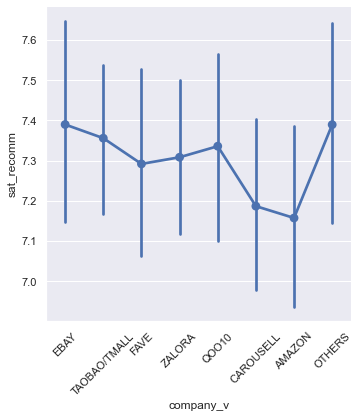

In [58]:
sns.factorplot('company_v', 'sat_recomm', data=train)
plt.xticks(rotation=45)

- 만족도가 낮은 CAROUSELL과 AMAZON이 추천정도도 매우 낮은 것을 보임.

## sat_overall

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'EBAY'),
  Text(1, 0, 'TAOBAO/TMALL'),
  Text(2, 0, 'FAVE'),
  Text(3, 0, 'ZALORA'),
  Text(4, 0, 'QOO10'),
  Text(5, 0, 'CAROUSELL'),
  Text(6, 0, 'AMAZON'),
  Text(7, 0, 'OTHERS')])

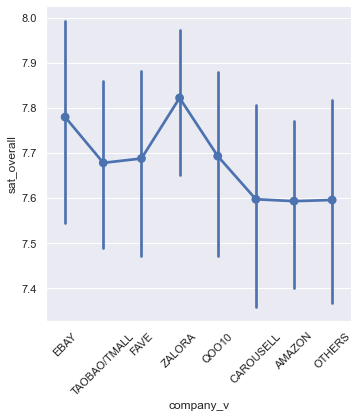

In [59]:
sns.factorplot('company_v', 'sat_overall', data=train)
plt.xticks(rotation=45)

- 만족도 양상과 매우 비슷 <- 만족도에 유의미한 값이기 때문일 것이라고 유추

## Interface

### if_suffinfo

In [60]:
train.if_suffinfo.value_counts()

7     326
8     306
6     188
9     180
10     96
5      11
4       8
3       3
1       1
2       1
Name: if_suffinfo, dtype: int64

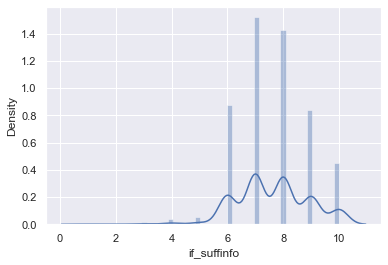

In [61]:
sns.distplot(train['if_suffinfo'])
plt.show()

In [62]:
company_SI = train['if_suffinfo'].groupby(train['company_v']).mean().to_frame().sort_values(by="if_suffinfo", ascending=False)
company_SI

,if_suffinfo
company_v,
EBAY,7.823529
ZALORA,7.773973
OTHERS,7.641221
TAOBAO/TMALL,7.624161
AMAZON,7.585714
QOO10,7.578571
CAROUSELL,7.522388
FAVE,7.430556


<Figure size 2160x1440 with 0 Axes>

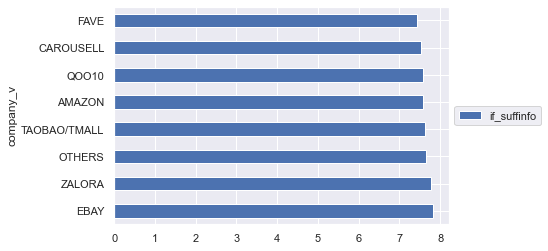

In [63]:
plt.figure(figsize = (30, 20))
sns.set(font_scale=1)
company_SI.plot(kind='barh')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

- 큰 차이는 없지만, 상위권과 하위권을 파악할 수 있게 됨
- Amazon이 전체 만족도가 높은 Zarola와 eBay를 포함한 과반수 이상의 쇼핑몰보다 낮은 평가 점수를 기록함
- Amazon이 평가 점수에서 타 쇼핑몰에 대해 상대 우위를 점하기 위해서는 이러한 낮은 평가를 받고 있는 항목에 집중해야 함
- 따라서 if_suffinfo는 다중회귀분석 모델에 포함함

### if_EasyComparing

In [64]:
train.if_EasyComparing.value_counts()

8     307
7     290
9     209
6     189
10    101
5      12
4       5
3       4
2       3
Name: if_EasyComparing, dtype: int64

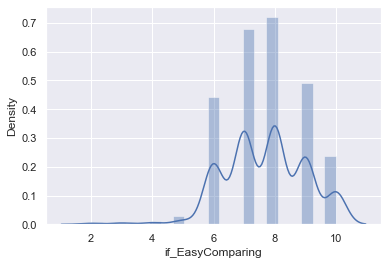

In [65]:
sns.distplot(train['if_EasyComparing'])
plt.show()

In [66]:
company_EC = train['if_EasyComparing'].groupby(train['company_v']).mean().to_frame().sort_values(by="if_EasyComparing", ascending=False)
company_EC

,if_EasyComparing
company_v,
EBAY,7.808824
ZALORA,7.794521
OTHERS,7.755725
FAVE,7.708333
CAROUSELL,7.664179
AMAZON,7.614286
TAOBAO/TMALL,7.590604
QOO10,7.564286


<Figure size 2160x1440 with 0 Axes>

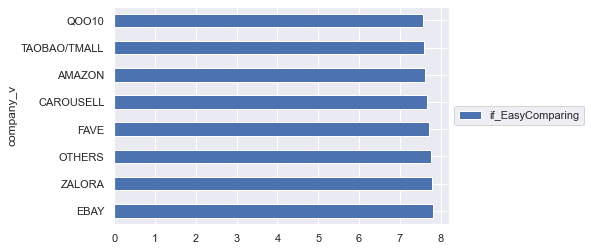

In [67]:
plt.figure(figsize = (30, 20))
sns.set(font_scale=1)
company_EC.plot(kind='barh')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

- 큰 차이는 없지만, 상위권과 하위권을 파악할 수 있게 됨
- Amazon이 전체 만족도가 높은 Zarola와 eBay를 포함한 과반수 이상의 쇼핑몰보다 낮은 평가 점수를 기록함
- Amazon이 평가 점수에서 타 쇼핑몰에 대해 상대 우위를 점하기 위해서는 이러한 낮은 평가를 받고 있는 항목에 집중해야 함
- 따라서 if_EasyComparing은 다중회귀분석 모델에 포함함

### if_EasySpecialReq

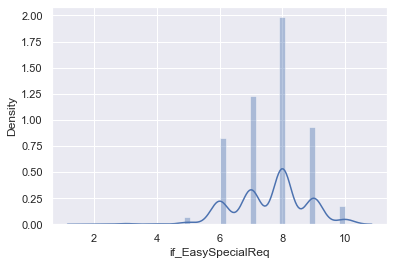

In [68]:
sns.distplot(train['if_EasySpecialReq'])
plt.show()

In [69]:
company_ESR = train['if_EasySpecialReq'].groupby(train['company_v']).mean().to_frame().sort_values(by="if_EasySpecialReq", ascending=False)
company_ESR

,if_EasySpecialReq
company_v,
TAOBAO/TMALL,7.691275
QOO10,7.664286
OTHERS,7.664122
EBAY,7.654412
CAROUSELL,7.634328
ZALORA,7.602740
FAVE,7.534722
AMAZON,7.485714


<Figure size 2160x1440 with 0 Axes>

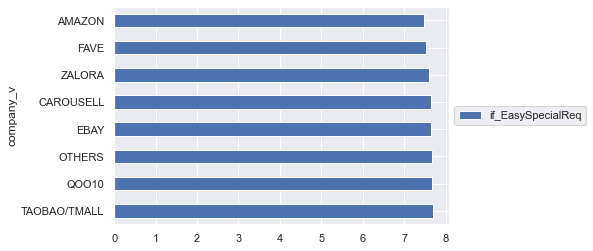

In [70]:
plt.figure(figsize = (30, 20))
sns.set(font_scale=1)
company_ESR.plot(kind='barh')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

- 큰 차이는 없지만, 상위권과 하위권을 파악할 수 있게 됨
- Amazon이 전체 만족도가 높은 Zarola와 eBay를 포함한 모든 쇼핑몰보다 낮은 평가 점수를 기록함
- Amazon이 평가 점수에서 타 쇼핑몰에 대해 상대 우위를 점하기 위해서는 이러한 낮은 평가를 받고 있는 항목에 집중해야 함
- 따라서 if_EasySpecialReq는 다중회귀분석 모델에 포함함

## Service

### serv_promo

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.]),
 [Text(-1.0, 0, 'AMAZON'),
  Text(0.0, 0, 'OTHERS'),
  Text(1.0, 0, 'FAVE'),
  Text(2.0, 0, 'ZALORA'),
  Text(3.0, 0, 'EBAY'),
  Text(4.0, 0, 'TAOBAO/TMALL'),
  Text(5.0, 0, 'CAROUSELL'),
  Text(6.0, 0, 'QOO10'),
  Text(7.0, 0, 'AMAZON'),
  Text(8.0, 0, '')])

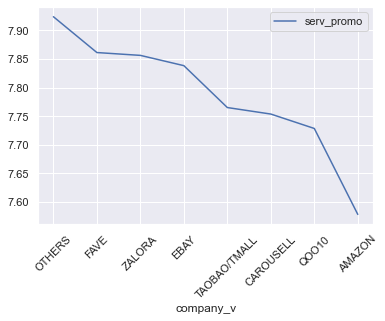

In [71]:
#serv_promo에서 Amazon은 하위권
train.groupby('company_v')[['serv_promo']].mean().sort_values(by ='serv_promo', ascending = False).plot()
plt.xticks(rotation=45)

- 만족도가 낮은 CAROUSELL과 AMAZON 모두 낮은 수치를 보이는 것으로 보아 만족도에 영향을 주는 것으로 예상

## Product

### pd_qual

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'EBAY'),
  Text(1, 0, 'TAOBAO/TMALL'),
  Text(2, 0, 'FAVE'),
  Text(3, 0, 'ZALORA'),
  Text(4, 0, 'QOO10'),
  Text(5, 0, 'CAROUSELL'),
  Text(6, 0, 'AMAZON'),
  Text(7, 0, 'OTHERS')])

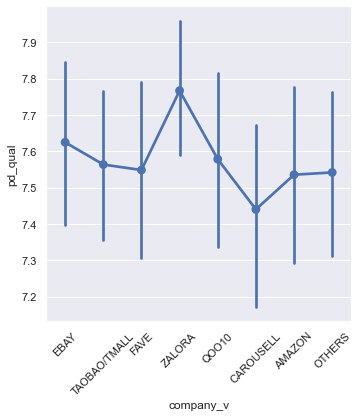

In [72]:
sns.factorplot('company_v', 'pd_qual', data=train)
plt.xticks(rotation=45)

- ZALORA, EBAY가 퀄리티 제일 높음
- AMAZON, CAROUSELL이 낮은 편
-> 만족도와 비슷한 양상. 유의미한 변수일 것이라 예상

### pd_pperp

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'EBAY'),
  Text(1, 0, 'TAOBAO/TMALL'),
  Text(2, 0, 'FAVE'),
  Text(3, 0, 'ZALORA'),
  Text(4, 0, 'QOO10'),
  Text(5, 0, 'CAROUSELL'),
  Text(6, 0, 'AMAZON'),
  Text(7, 0, 'OTHERS')])

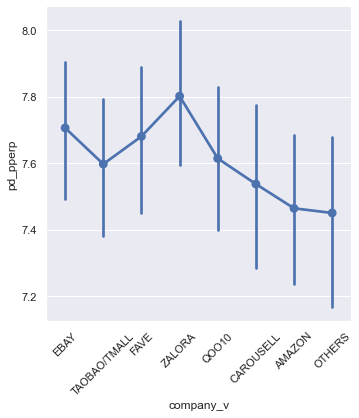

In [73]:
sns.factorplot('company_v', 'pd_pperp', data=train)
plt.xticks(rotation=45)

- ZALORA, EBAY가 퀄리티 제일 높음
- AMAZON, CAROUSELL이 낮은 편
- AMAZON의 가성비는 떨어지는 편
-> 만족도와 비슷한 양상. 유의미한 변수일 것이라 예상

### pd_satisvar

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'EBAY'),
  Text(1, 0, 'TAOBAO/TMALL'),
  Text(2, 0, 'FAVE'),
  Text(3, 0, 'ZALORA'),
  Text(4, 0, 'QOO10'),
  Text(5, 0, 'CAROUSELL'),
  Text(6, 0, 'AMAZON'),
  Text(7, 0, 'OTHERS')])

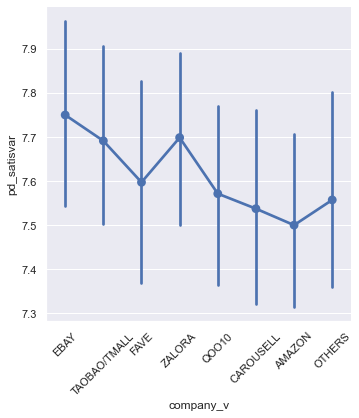

In [74]:
sns.factorplot('company_v', 'pd_satisvar', data=train)
plt.xticks(rotation=45)

- EBAY가 흥미로운 제품의 다양성은 낮은 편이었지만 요구를 충족한 제품의 다양성은 높은 편이다.
- 즉 흥미로워 보이는 것자체가 많이 없어보여도 실질적으로 썼을 때 요구를 충족한 제품은 많은 것임
- Amazon은 여기서 Carousel보다도 낮은 편에 속한다.
-> 만족도 순위와 비슷한 것으로 보아 만족도에 영향을 줄 것이라 예상

## Delivery

### deliver_range

<AxesSubplot:xlabel='company_v'>

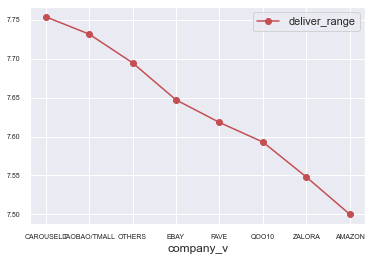

In [75]:
range_mean = train.groupby('company_v')[['deliver_range']].mean().sort_values(by ='deliver_range', ascending = False)
range_mean.plot(marker='o', color=['r','b','g','y', 'c', 'm', 'k', 'w'], fontsize=7)

### deliver_time

<AxesSubplot:xlabel='company_v'>

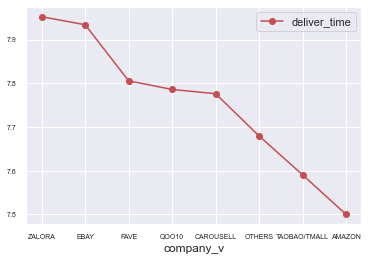

In [76]:
time_mean = train.groupby('company_v')[['deliver_time']].mean().sort_values(by ='deliver_time', ascending = False)
time_mean.plot(marker='o', color=['r','b','g','y', 'c', 'm', 'k', 'w'], fontsize=7)

# Modeling

## 변수 선정 (후진소거법)

In [77]:
from statsmodels.formula.api import ols

In [78]:
model2 = ols('satis ~ sat_repur + sat_recomm + sat_overall + pd_qual + pd_pperp + pd_satisvar + if_suffinfo + if_EasyComparing + if_EasySpecialReq + serv_promo + pd_same + serv_feedback + deliver_range + deliver_time', data=train)
result2 = model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  satis   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     453.2
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:03:33   Log-Likelihood:                -707.87
No. Observations:                1120   AIC:                             1446.
Df Residuals:                    1105   BIC:                             1521.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.5472      0.127     -4.318      0.000      -0.796      -0.299
sat_repur             0.0734      0.018      4.154      0.000       0.039       0.108
sat_recomm            0.0510      0.016      3.282      0.001       0.021       0.082
sat_overall           0.4271      0.022     19.720      0.000       0.385       0.470
pd_qual               0.1125      0.014      7.779      0.000       0.084       0.141
pd_pperp              0.1181      0.015      7.994      0.000       0.089       0.147
pd_satisvar           0.0242      0.013      1.917      0.055      -0.001       0.049
if_suffinfo           0.0511      0.014      3.749      0.000       0.024       0.078
if_EasyComparing      0.0418      0.014      3.078      0.002       0.015       0.068
if_EasySpecialReq     0.0090      0.016      0.579      0.563      -0.022       0.040
serv_promo            0.0315      0.012      2.533      0.011       0.007       0.056
pd_same               0.0257      0.013      1.949      0.052      -0.000       0.052
serv_feedback         0.0538      0.014      3.879      0.000       0.027       0.081
deliver_range         0.0238      0.014      1.686      0.092      -0.004       0.052
deliver_time          0.0228      0.014      1.671      0.095      -0.004       0.050
==============================================================================
Omnibus:                       12.479   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               10.806
Skew:                          -0.177   Prob(JB):                      0.00450
Kurtosis:                       2.675   Cond. No.                         266.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 상호작용 고려

In [79]:
coll = ['sat_repur', 'sat_recomm', 'sat_overall', 'pd_qual', 'pd_pperp', 'pd_satisvar', 'if_suffinfo', 'if_EasyComparing', 'if_EasySpecialReq', 'serv_promo', 'pd_same', 'serv_feedback', 'deliver_range', 'deliver_time']

In [80]:
train__ = train[coll]

In [81]:
from statsmodels.regression import linear_model
from sklearn.preprocessing import PolynomialFeatures
#generating interaction terms
x_interaction2 = PolynomialFeatures(2, interaction_only=True, include_bias=False).fit_transform(train__)
#creating a new dataframe with the interaction terms included
interaction_df2 = pd.DataFrame(x_interaction2)

# 두가지 feature들을 사용한 모든 조합 생성

# 새로운 dataframe을 가지고 OLS model fitting
interaction_model2 = linear_model.OLS(train.satis, interaction_df2).fit()

#위 모델에서 p-value값이 0.05 미만(즉, 유의한 변수들만을 추출)
interaction_model2.pvalues[interaction_model2.pvalues < 0.05]

4     0.010761
7     0.030884
14    0.023998
16    0.043807
19    0.003504
27    0.037256
32    0.008056
34    0.002193
36    0.025008
41    0.013338
47    0.007466
50    0.015878
88    0.006769
91    0.039996
dtype: float64

- pd_pperp
- if_EasyComparing
- sat_repur * sat_recomm
- sat_repur * pd_qual
- sat_repur * if_suffinfo
- sat_recomm * sat_overall
- sat_recomm * if_EasyComparing
- sat_recomm * serv_promo
- sat_recomm * serv_feedback
- sat_overall * pd_satisvar
- sat_overall * serv_feedback
- pd_qual * pd_pperp
- if_EasyComparing * deliver_range
- if_EasySpecialReq * pd_same

In [82]:
newmodel = ols('satis ~ pd_pperp + if_EasyComparing + sat_repur * sat_recomm + sat_repur * pd_qual + sat_repur * if_suffinfo + sat_recomm * sat_overall + sat_recomm * if_EasyComparing + sat_recomm * serv_promo + sat_recomm * serv_feedback + sat_overall * pd_satisvar + sat_overall * serv_feedback + pd_qual * pd_pperp + if_EasyComparing * deliver_range + if_EasySpecialReq * pd_same', data=train)
resultnew = newmodel.fit()
resultnew.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  satis   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     267.7
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:03:36   Log-Likelihood:                -677.57
No. Observations:                1120   AIC:                             1407.
Df Residuals:                    1094   BIC:                             1538.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          2.0639      0.564      3.660      0.000       0.958       3.170
pd_pperp                           0.0465      0.064      0.725      0.469      -0.079       0.173
if_EasyComparing                  -0.0654      0.072     -0.913      0.361      -0.206       0.075
sat_repur                         -0.0622      0.100     -0.624      0.533      -0.258       0.133
sat_recomm                         0.0918      0.106      0.868      0.385      -0.116       0.299
sat_repur:sat_recomm               0.0215      0.012      1.729      0.084      -0.003       0.046
pd_qual                            0.1250      0.070      1.784      0.075      -0.013       0.263
sat_repur:pd_qual                 -0.0130      0.011     -1.221      0.222      -0.034       0.008
if_suffinfo                       -0.0282      0.068     -0.414      0.679      -0.162       0.106
sat_repur:if_suffinfo              0.0107      0.009      1.172      0.241      -0.007       0.029
sat_overall                        0.7511      0.124      6.042      0.000       0.507       0.995
sat_recomm:sat_overall            -0.0534      0.014     -3.888      0.000      -0.080      -0.026
sat_recomm:if_EasyComparing       -0.0266      0.010     -2.699      0.007      -0.046      -0.007
serv_promo                        -0.1285      0.067     -1.933      0.054      -0.259       0.002
sat_recomm:serv_promo              0.0214      0.009      2.377      0.018       0.004       0.039
serv_feedback                     -0.0123      0.071     -0.174      0.862      -0.151       0.126
sat_recomm:serv_feedback           0.0330      0.013      2.512      0.012       0.007       0.059
pd_satisvar                       -0.2191      0.067     -3.271      0.001      -0.351      -0.088
sat_overall:pd_satisvar            0.0317      0.009      3.656      0.000       0.015       0.049
sat_overall:serv_feedback         -0.0230      0.012     -1.867      0.062      -0.047       0.001
pd_qual:pd_pperp                   0.0097      0.008      1.157      0.247      -0.007       0.026
deliver_range                     -0.2683      0.065     -4.109      0.000      -0.396      -0.140
if_EasyComparing:deliver_range     0.0397      0.009      4.618      0.000       0.023       0.057
if_EasySpecialReq                  0.0673      0.067      1.012      0.312      -0.063       0.198
pd_same                            0.0955      0.064      1.482      0.139      -0.031       0.222
if_EasySpecialReq:pd_same         -0.0085      0.008     -0.999      0.318      -0.025       0.008
==============================================================================
Omnibus:                       17.908   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (J

## 다중공선성

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [84]:
vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(train[coll].values, i) for i in range(train[coll].shape[1])]

vif["features"] = train[coll].columns

vif

,VIF Factor,features
0,94.929457,sat_repur
1,70.777198,sat_recomm
2,149.103911,sat_overall
3,65.936796,pd_qual
4,69.409706,pd_pperp
5,47.884813,pd_satisvar
6,58.975951,if_suffinfo
7,59.333955,if_EasyComparing
8,73.028393,if_EasySpecialReq
9,50.059199,serv_promo


In [85]:
copy = train[coll]
copy = copy.drop(['sat_overall'], axis=1)

vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(copy.values, i) for i in range(copy.shape[1])]

vif["features"] = copy.columns

vif

,VIF Factor,features
0,88.324673,sat_repur
1,69.769441,sat_recomm
2,63.251911,pd_qual
3,65.328965,pd_pperp
4,47.567942,pd_satisvar
5,58.881190,if_suffinfo
6,58.473719,if_EasyComparing
7,72.386287,if_EasySpecialReq
8,50.058707,serv_promo
9,57.108785,pd_same


In [86]:
copy = copy.drop(['sat_repur'], axis=1)

vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(copy.values, i) for i in range(copy.shape[1])]

vif["features"] = copy.columns

vif

,VIF Factor,features
0,63.846654,sat_recomm
1,61.428112,pd_qual
2,64.069623,pd_pperp
3,47.229831,pd_satisvar
4,58.738453,if_suffinfo
5,58.466090,if_EasyComparing
6,71.552047,if_EasySpecialReq
7,50.038579,serv_promo
8,57.047723,pd_same
9,56.990156,serv_feedback


In [87]:
copy = copy.drop(['if_EasySpecialReq'], axis=1)

vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(copy.values, i) for i in range(copy.shape[1])]

vif["features"] = copy.columns

vif

,VIF Factor,features
0,62.080986,sat_recomm
1,61.408500,pd_qual
2,63.739699,pd_pperp
3,46.661043,pd_satisvar
4,58.060510,if_suffinfo
5,57.442357,if_EasyComparing
6,49.782982,serv_promo
7,57.039509,pd_same
8,56.026961,serv_feedback
9,58.541304,deliver_range


In [88]:
copy = copy.drop(['pd_pperp'], axis=1)

vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(copy.values, i) for i in range(copy.shape[1])]

vif["features"] = copy.columns

vif

,VIF Factor,features
0,61.514959,sat_recomm
1,55.613312,pd_qual
2,46.089010,pd_satisvar
3,57.948200,if_suffinfo
4,56.827209,if_EasyComparing
5,49.708205,serv_promo
6,56.519574,pd_same
7,55.744404,serv_feedback
8,58.012731,deliver_range
9,57.353438,deliver_time


In [89]:
copy = copy.drop(['sat_recomm'], axis=1)

vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(copy.values, i) for i in range(copy.shape[1])]

vif["features"] = copy.columns

vif

,VIF Factor,features
0,52.473661,pd_qual
1,46.088672,pd_satisvar
2,57.188036,if_suffinfo
3,56.138143,if_EasyComparing
4,49.658834,serv_promo
5,56.199040,pd_same
6,52.582622,serv_feedback
7,55.169888,deliver_range
8,57.071463,deliver_time


In [90]:
string = ''

for i in copy.columns:
    string = string + '+' + i

print(string)
    

+pd_qual+pd_satisvar+if_suffinfo+if_EasyComparing+serv_promo+pd_same+serv_feedback+deliver_range+deliver_time


In [91]:
modeltestjust = ols ('satis ~ pd_qual+pd_satisvar+if_suffinfo+if_EasyComparing+serv_promo+pd_same+serv_feedback+deliver_range+deliver_time', data=train)
resulttestjust=modeltestjust.fit()
resulttestjust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  satis   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     347.6
Date:                Thu, 07 Oct 2021   Prob (F-statistic):          1.32e-315
Time:                        13:03:37   Log-Likelihood:                -1026.2
No. Observations:                1120   AIC:                             2072.
Df Residuals:                    1110   BIC:                             2123.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.8198      0.163     -5.042      0.000      -1.139      -0.501
pd_qual              0.2923      0.017     17.115      0.000       0.259       0.326
pd_satisvar          0.0857      0.016      5.218      0.000       0.053       0.118
if_suffinfo          0.1022      0.018      5.736      0.000       0.067       0.137
if_EasyComparing     0.1183      0.018      6.757      0.000       0.084       0.153
serv_promo           0.0441      0.016      2.678      0.008       0.012       0.076
pd_same              0.0679      0.017      3.914      0.000       0.034       0.102
serv_feedback        0.1589      0.017      9.181      0.000       0.125       0.193
deliver_range        0.1356      0.018      7.690      0.000       0.101       0.170
deliver_time         0.0946      0.018      5.313      0.000       0.060       0.130
==============================================================================
Omnibus:                       33.386   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.779
Skew:                          -0.366   Prob(JB):                     3.80e-09
Kurtosis:                       3.543   Cond. No.                         208.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 다중공선성을 고려해서 피처를 줄이면 오히려 AIC 값 증가 => 줄이지 않기로 결정

## 최종 모델 선정

# AIC 산출

In [92]:
test = pd.read_csv("test_data_1.csv")

In [93]:
test

,uid,company_v,poverq,soverq,pq,satis,repur,recomm,Q19,VN_1009_Q20A,...,race,work,pincome,income,educat,childsupp,marital,gender,house,DOI
0,1571,CAROUSELL,6,7,6,6,6,7,0,6,...,1,1,2,5,4,3,2,1,3,2018.6.3
1,3229,AMAZON,2,5,4,3,3,3,0,2,...,1,3,,3,7,2,2,2,3,4/14/2018
2,3219,CAROUSELL,8,7,8,7,7,7,0,7,...,1,1,4,6,7,3,2,1,3,4/13/2018
3,4497,EBAY,9,8,7,8,7,8,0,9,...,1,1,5,6,8,3,2,1,3,4/15/2018
4,5573,AMAZON,6,8,7,7,8,7,0,8,...,1,1,2,8,7,99,1,1,5,3/17/2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,1650,ZALORA,9,7,7,8,7,9,0,8,...,1,1,4,5,8,3,2,2,4,2018.10.3
476,5357,CAROUSELL,6,8,8,8,8,8,1,8,...,1,1,7,9,8,3,2,1,5,3/19/2018
477,4458,REDMART,8,9,9,9,7,7,0,9,...,1,1,7,8,8,1,2,1,3,3/29/2018
478,827,FAVE,7,7,7,6,6,6,0,6,...,1,1,2,5,7,99,1,2,3,2/25/2018


In [94]:
test.rename(columns={'VN_1009_TP20' : 'MethodFreq', 'VN_1009_TP21' : 'MethodPref', 'VN_1009_TP21_6specify' : 'specificMethodPref',
                      'VN_1009_TP24_1' : 'ReviewReading', 'VN_1009_TP24_2' : 'Interaction', 'Q9C_P' : 'NumofPurchase', 'Q9D' : 'AvgAmountSpent',
                       'VN_1009_TP25A' : 'StoreLocation', 'poverq' : 'pd_qual', 'pq' : 'pd_pperp', 'repur' : 'sat_repur', 
                     'recomm':'sat_recomm', 'Q19':'sat_recomornot', 'VN_1009_Q20A' : 'sat_overall', 'VN_1009_TP01' : 'pd_interestvar',
                     'VN_1009_TP02':'pd_satisvar', 'VN_1009_TP05' : 'pd_avail', 'VN_1009_TP17':'pd_same', 
                      'soverq':'serv_qual', 'VN_1009_TP06':'serv_promo', 'VN_1009_TP18':'serv_feedback', 
                      'VN_1009_TP19':'serv_return', 'VN_1009_TP22':'serv_review', 'VN_1009_TP23':'serv_channels',
                     'VN_1009_TP13':'deliver_info', 'VN_1009_TP14':'deliver_range', 'VN_1009_TP15':'deliver_easytracking',
                      'VN_1009_TP16':'deliver_time','VN_1009_TP03' : 'if_EasyWeborApp', 'VN_1009_TP04': 'if_EasyFinding',
                      'VN_1009_TP07' : 'if_suffinfo',
                      'VN_1009_TP08' : 'if_EasyComparing', 'VN_1009_TP09': 'if_EasySpecialReq',
                      'VN_1009_TP10' : 'if_EasyShopcart', 'VN_1009_TP11' : 'if_Payment',
                      'VN_1009_TP12' : 'if_SafeWebsite'}, inplace=True)

In [95]:
# company별로 데이터 나누기

AMAZON = test[test['company_v'].isin(['AMAZON'])]
ZALORA = test[test['company_v'].isin(['ZALORA'])]
FAVE = test[test['company_v'].isin(['FAVE'])]
QOO10 = test[test['company_v'].isin(['QOO10'])]
EBAY = test[test['company_v'].isin(['EBAY'])]
TAOBAO = test[test['company_v'].isin(['TAOBAO/TMALL'])]
CAROUSELL = test[test['company_v'].isin(['CAROUSELL'])]
OTHERS = test[~test['company_v'].isin(['AMAZON', 'ZALORA', 'FAVE', 'QOO10', 'EBAY', 'TAOBAO/TMALL', 'CAROUSELL'])]

In [96]:
# 메인 회사 이외의 회사들을 others로 처리

test.loc[test['company_v'].isin(['SSENSE', 'SHOPBOP', 'ASOS', 'ALIEXPRESS', 'EZBUY', 'SHOPEE','NET-A-PORTER', 'LAZADA', 
                                   'HONESTBEE', 'REEBONZ', 'WISH', 'REDMART', 'DRESSABELLE', 'RAKUTEN']), 'company_v'] = 'OTHERS'

In [97]:
test.company_v.unique()

array(['CAROUSELL', 'AMAZON', 'EBAY', 'OTHERS', 'ZALORA', 'TAOBAO/TMALL',
       'FAVE', 'QOO10'], dtype=object)

In [98]:
test.columns

Index(['uid', 'company_v', 'pd_qual', 'serv_qual', 'pd_pperp', 'satis',
       'sat_repur', 'sat_recomm', 'sat_recomornot', 'sat_overall',
       'pd_interestvar', 'pd_satisvar', 'if_EasyWeborApp', 'if_EasyFinding',
       'pd_avail', 'serv_promo', 'if_suffinfo', 'if_EasyComparing',
       'if_EasySpecialReq', 'if_EasyShopcart', 'if_Payment', 'if_SafeWebsite',
       'deliver_info', 'deliver_range', 'deliver_easytracking', 'deliver_time',
       'pd_same', 'serv_feedback', 'serv_return', 'MethodFreq', 'MethodPref',
       'specificMethodPref', 'ReviewReading', 'Interaction', 'serv_review',
       'serv_channels', 'NumofPurchase', 'AvgAmountSpent', 'StoreLocation',
       'age', 'race', 'work', 'pincome', 'income', 'educat', 'childsupp',
       'marital', 'gender', 'house', 'DOI'],
      dtype='object')

## 결측치 처리

In [99]:
# if_EasySpecialReq
test.if_EasySpecialReq.replace([97, 98, 99], np.nan, inplace=True)
if_EasySpecialReq_mode = test.if_EasySpecialReq.value_counts(dropna = True).idxmax()
test.if_EasySpecialReq =  test.if_EasySpecialReq.fillna(if_EasySpecialReq_mode) #최빈값

#deliver_info
test.deliver_info.replace([97, 98, 99], np.nan, inplace=True)
deliver_info_mode = test.deliver_info.value_counts(dropna = True).idxmax()
test.deliver_info =  test.deliver_info.fillna(deliver_info_mode).astype(np.int64) #최빈값

#deliver_range
test.deliver_range.replace([97, 98, 99], np.nan, inplace=True)
deliver_range_mode = test.deliver_range.value_counts(dropna = True).idxmax()
test.deliver_range =test.deliver_range.fillna(deliver_range_mode).astype(np.int64) #최빈값

#deliver_easytracking
test.deliver_easytracking.replace([97, 98, 99], np.nan, inplace=True)
deliver_easytracking_mode = test.deliver_easytracking.value_counts(dropna = True).idxmax()
test.deliver_easytracking =  test.deliver_easytracking.fillna(deliver_easytracking_mode).astype(np.int64) #최빈값

#deliver_time
test.deliver_time.replace([97, 98, 99], np.nan, inplace=True)
deliver_time_mode = test.deliver_time.value_counts(dropna = True).idxmax()
test.deliver_time =  test.deliver_time.fillna(deliver_time_mode) #최빈값

#serv_feedback
test.serv_feedback.replace([97, 98, 99], np.nan, inplace=True)
serv_feedback_mode = test.serv_feedback.value_counts(dropna = True).idxmax()
test.serv_feedback =  test.serv_feedback.fillna(serv_feedback_mode) #최빈값

#serv_return
test.serv_return.replace([97, 98, 99], np.nan, inplace=True)
serv_return_mode = test.serv_return.value_counts(dropna = True).idxmax()
test.serv_return =  test.serv_return.fillna(serv_return_mode) #최빈값

#pincome
test.pincome.replace(' ', 98, inplace=True)
test.pincome = test.pincome.astype(np. int64)
test.pincome.replace([97, 98, 99], np.nan, inplace=True)
pincome_mode = test.pincome.value_counts(dropna = True).idxmax()
test.pincome =  test.pincome.fillna(pincome_mode) #최빈값

#income
test.income.replace([97, 98, 99], np.nan, inplace=True)
income_mode = test.income.value_counts(dropna = True).idxmax()
test.income =  test.income.fillna(income_mode).astype(np. int64) #최빈값

#childsupp
test.childsupp.replace(99,1, inplace=True)

- 자녀여부의 무응답(99)와 혼인 여부에서 single을 선택한 사람 수가 동일 (다른 company도 마찬가지)<br>
    -> 99를 자녀 None으로 변경!

## test(상호작용X)

In [100]:
modeltest1 = ols('satis ~ sat_repur + sat_recomm + sat_overall + pd_qual + pd_pperp + pd_satisvar + if_suffinfo + if_EasyComparing + if_EasySpecialReq + serv_promo + pd_same + serv_feedback + deliver_range + deliver_time', data=test)
resulttest1=modeltest1.fit()
resulttest1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  satis   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     244.8
Date:                Thu, 07 Oct 2021   Prob (F-statistic):          3.26e-204
Time:                        13:03:37   Log-Likelihood:                -264.40
No. Observations:                 480   AIC:                             558.8
Df Residuals:                     465   BIC:                             621.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.5720      0.184     -3.112      0.002      -0.933      -0.211
sat_repur             0.1219      0.026      4.766      0.000       0.072       0.172
sat_recomm            0.0580      0.022      2.595      0.010       0.014       0.102
sat_overall           0.3955      0.031     12.891      0.000       0.335       0.456
pd_qual               0.1184      0.021      5.560      0.000       0.077       0.160
pd_pperp              0.1584      0.020      7.760      0.000       0.118       0.199
pd_satisvar           0.1015      0.018      5.750      0.000       0.067       0.136
if_suffinfo           0.0176      0.020      0.897      0.370      -0.021       0.056
if_EasyComparing      0.0126      0.019      0.663      0.508      -0.025       0.050
if_EasySpecialReq     0.0240      0.021      1.130      0.259      -0.018       0.066
serv_promo            0.0368      0.017      2.146      0.032       0.003       0.070
pd_same               0.0205      0.019      1.054      0.292      -0.018       0.059
serv_feedback         0.0116      0.020      0.573      0.567      -0.028       0.051
deliver_range        -0.0089      0.021     -0.432      0.666      -0.049       0.032
deliver_time          0.0087      0.020      0.436      0.663      -0.030       0.048
==============================================================================
Omnibus:                        9.904   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                9.909
Skew:                          -0.332   Prob(JB):                      0.00705
Kurtosis:                       3.233   Cond. No.                         270.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## test(상호작용 고려O)

In [101]:
modeltest2 = ols ('satis ~ pd_pperp + if_EasyComparing + sat_repur * sat_recomm + sat_repur * pd_qual + sat_repur * if_suffinfo + sat_recomm * sat_overall + sat_recomm * if_EasyComparing + sat_recomm * serv_promo + sat_recomm * serv_feedback + sat_overall * pd_satisvar + sat_overall * serv_feedback + pd_qual * pd_pperp + if_EasyComparing * deliver_range + if_EasySpecialReq * pd_same', data=test)
resulttest2=modeltest2.fit()
resulttest2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  satis   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     140.0
Date:                Thu, 07 Oct 2021   Prob (F-statistic):          1.37e-195
Time:                        13:03:37   Log-Likelihood:                -254.93
No. Observations:                 480   AIC:                             561.9
Df Residuals:                     454   BIC:                             670.4
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          1.6665      0.961      1.735      0.083      -0.221       3.554
pd_pperp                           0.1418      0.110      1.288      0.198      -0.075       0.358
if_EasyComparing                   0.0357      0.120      0.298      0.766      -0.200       0.271
sat_repur                          0.0277      0.149      0.186      0.852      -0.265       0.321
sat_recomm                         0.1921      0.164      1.173      0.241      -0.130       0.514
sat_repur:sat_recomm              -0.0121      0.019     -0.652      0.515      -0.049       0.024
pd_qual                           -0.0121      0.125     -0.097      0.923      -0.258       0.233
sat_repur:pd_qual                  0.0144      0.018      0.794      0.428      -0.021       0.050
if_suffinfo                       -0.0495      0.105     -0.469      0.639      -0.257       0.158
sat_repur:if_suffinfo              0.0084      0.014      0.605      0.545      -0.019       0.036
sat_overall                        0.5249      0.186      2.829      0.005       0.160       0.890
sat_recomm:sat_overall            -0.0373      0.021     -1.799      0.073      -0.078       0.003
sat_recomm:if_EasyComparing       -0.0137      0.015     -0.923      0.356      -0.043       0.015
serv_promo                        -0.1896      0.087     -2.180      0.030      -0.361      -0.019
sat_recomm:serv_promo              0.0314      0.012      2.695      0.007       0.008       0.054
serv_feedback                      0.0059      0.092      0.064      0.949      -0.175       0.186
sat_recomm:serv_feedback           0.0149      0.020      0.763      0.446      -0.024       0.053
pd_satisvar                       -0.1196      0.093     -1.287      0.199      -0.302       0.063
sat_overall:pd_satisvar            0.0304      0.012      2.500      0.013       0.007       0.054
sat_overall:serv_feedback         -0.0133      0.017     -0.785      0.433      -0.047       0.020
pd_qual:pd_pperp                   0.0018      0.014      0.124      0.901      -0.026       0.030
deliver_range                     -0.0852      0.101     -0.847      0.397      -0.283       0.112
if_EasyComparing:deliver_range     0.0104      0.013      0.825      0.410      -0.014       0.035
if_EasySpecialReq                  0.0255      0.123      0.208      0.836      -0.216       0.267
pd_same                            0.0182      0.117      0.155      0.877      -0.212       0.248
if_EasySpecialReq:pd_same         -0.0003      0.015     -0.019      0.985      -0.031       0.030
==============================================================================
Omnibus:                       10.163   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.006   Jarque-Bera (J

## 최종 모델 결정 -> AIC 산출

상호작용 고려하니 오히려 AIC 높아짐! -> 고려 안한 버전으로 결정

In [102]:
print("최종 모델의 AIC:", resulttest1.aic)

최종 모델의 AIC: 558.7968146609477


# 인사이트

기존 강점: #여초 #상호작용up #안전함 #젊은피 #돈없음

크리티컬한 단점: 제품 퀄리티, 인터페이스(정보비교, 요청), promotion, 배송 옵션과 배달 시간

—>기존 강점을 살리되 크리티컬한 단점을 보완하고 본인들의 타겟 고객층을 잘 이해하여 운영해야한다.

=> 20대 후반 여자 - 소비자 타겟층<br>
=> 제품 퀄리티 혹은 만족하게 만드는 제품들의 다양성이 떨어짐 -> 해결해야함<br>
=> delivery 전체적으로 배달이 뒤떨어지긴 하나, 특히 배달 option의 다양성이 보충되어야 하고 배달 시간에 만족도를 높여야 한다.<br>
=> service는 제품에 비해 심각하게 나쁜건 아니지만 그래도 전반적으로 개선이 필요함. 특히 promotion<br>
=> interface의 보안이나 안전은 좋음. 독자적인 지불수단 반응 good -> 제품과 관련된 인터페이스(정보비교, 요청 등)를 개발해야한다.<br>

=> amazon MZ 여성이 관심을 가질만한 곳인데,
강점을 갖고 있는 부분이 제품과 같은 메인요소가 아니라 제품을 편리하게 구매하기 위한 부가적인 부분이기 때문에 충성고객을 끌기에 어렵다.<br>
제품적인 메리트 적고, MZ 세대나 요즘 시국에 가장 중요한 부분인 배달 서비스의 부족이 큰 문제가 될 수 있음